## TEORIA PERKOLACJI W POŻARACH LASÓW

In [528]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image, ImageDraw

In [529]:
# Parametry siatki
grid_size = 50  # Rozmiar siatki
p_fire = 0.7   # Prawdopodobieństwo zapalenia sąsiedniego drzewa
p_tree = 0.6   # Prawdopodobieństwo początkowego istnienia drzewa
p_stop = 0.003  # Prawdopodobieństwo wygaszenia ognia

In [530]:
# Stany i kolory drzew
# 0 - PUSTE, 1 - DRZEWO, 2 - PALĄCE SIĘ, 3 - SPALONE

tree_cond = {
    0: "EMPTY",
    1: "TREE",
    2: "BURNING",
    3: "BURNT"
}

tree_color = {
    0: "white",
    1: "green",
    2: "red",
    3: "black"
}

In [531]:
def forest_grid(grid_size, p_tree):
    random_vals = np.random.rand(grid_size, grid_size)
    forest = (random_vals < p_tree).astype(int)     
    return forest

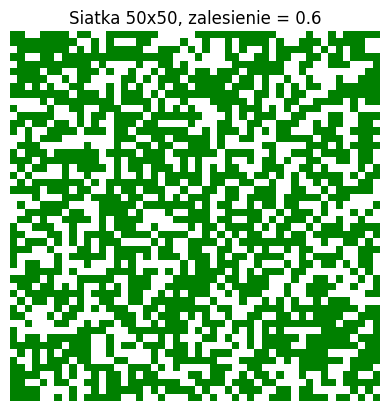

In [532]:
forest = forest_grid(grid_size, p_tree)
cmap_forest = ListedColormap([tree_color[0], tree_color[1]])
plt.imshow(forest, cmap=cmap_forest)
plt.axis('off')
plt.title(f'Siatka {grid_size}x{grid_size}, zalesienie = {p_tree}')
plt.show()

In [533]:
def get_neighbors(x, y, size, neighborhood):
    if neighborhood == "von_neumann":
        neighbors = np.array([(x-1, y), (x+1, y), (x, y-1), (x, y+1)])
    elif neighborhood == "moore":
        neighbors = np.array([(x-1, y-1), (x-1, y), (x-1, y+1),  
                            (x, y-1), (x, y+1),             
                            (x+1, y-1), (x+1, y), (x+1, y+1)])
    else:
        return [] 
    neighbors = [(nx, ny) for nx, ny in neighbors if 0 <= nx < size and 0 <= ny < size] 
    return neighbors

In [534]:
def start_fire(grid_size, p_tree):
    forest_start = forest_grid(grid_size, p_tree)
    fire_start = np.random.randint(0, grid_size, size=2)
    while forest[fire_start[0], fire_start[1]] != 1: 
        fire_start = np.random.randint(0, grid_size, size=2)
    forest_start[fire_start[0], fire_start[1]] = 2
    return forest_start

In [535]:
def spread_fire(forest, grid_size, p_fire, p_stop, neighborhood):
    forest_on_fire = forest.copy()
    neighbors_burning = np.argwhere(forest_on_fire == 2) 
    
    for is_burning in neighbors_burning:
        neighbors = get_neighbors(is_burning[0], is_burning[1], grid_size, neighborhood)
        
        for neighbor in neighbors:
            if forest_on_fire[neighbor[0], neighbor[1]] == 1 and np.random.rand() < p_fire:
                forest_on_fire[neighbor[0], neighbor[1]] = 2 
            elif forest_on_fire[neighbor[0], neighbor[1]] == 2 and np.random.rand() < p_stop:
                forest_on_fire[neighbor[0], neighbor[1]] = 3 
    
    return forest_on_fire

In [536]:
def fire_simulation(grid_size, p_fire, p_tree, p_stop, neighborhood, gif_name, M = 100): 
    forest = start_fire(grid_size, p_tree)
    cmap_forest = ListedColormap(tree_color.values())

    frames = []
    for step in range(M):
        forest = spread_fire(forest, grid_size, p_fire, p_stop, neighborhood)    
        fig, ax = plt.subplots(figsize=(7, 7), dpi=80)
        ax.imshow(forest, cmap=cmap_forest, vmin=0, vmax=3)
        ax.axis('off')
        ax.set_title(f'Siatka {grid_size}x{grid_size}, zalesienie = {p_tree}')
        
        plt.draw()
        fig.canvas.draw()

        buf = fig.canvas.buffer_rgba()
        image = Image.frombytes('RGBA', fig.canvas.get_width_height(), buf)
        frames.append(image)
        plt.close(fig)
        
    frames[0].save(f'{gif_name}.gif', save_all=True, append_images=frames[1:], loop=0, duration=300)
    print(f"Animacja została zapisana jako '{gif_name}.gif'")

In [537]:
fire_simulation(grid_size, p_fire, p_tree, p_stop, neighborhood="von_neumann", gif_name = "Neumann_50x50", M=100)

Animacja została zapisana jako 'Neumann_50x50.gif'


In [538]:
fire_simulation(grid_size, p_fire, p_tree, p_stop, neighborhood="moore", gif_name = "Moore_50x50", M=100)

Animacja została zapisana jako 'Moore_50x50.gif'
